In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import svm,decomposition
import matplotlib.pyplot as plt
import numpy as np 
dataset = datasets.load_breast_cancer()
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

(426, 30) (143, 30)


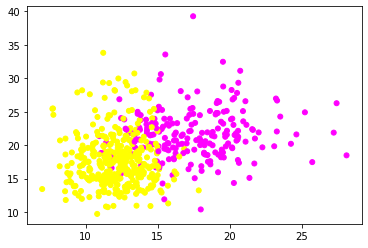

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data ,dataset.target, random_state=65)

print(X_train.shape, X_test.shape)
# plotting scatters
plt.scatter(dataset.data[:, 0], dataset.data[:, 1], c=dataset.target, s=25,cmap='spring');
plt.show()

In [3]:
pca = decomposition.PCA(n_components=20, whiten=True, random_state=65)
pca.fit(X_train)

PCA(n_components=20, random_state=65, whiten=True)

In [4]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

clf = svm.SVC(C=2., gamma=0.005, random_state=65)
clf.fit(X_train_pca, y_train)

(426, 20)


SVC(C=2.0, gamma=0.005, random_state=65)

In [5]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.96      1.00      0.98        81

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [6]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=2, whiten=True)), ('svm', svm.LinearSVC(C=2.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[58  2]
 [ 4 79]]
